[Lesson 2: Perceptrons as Logical Operators](https://classroom.udacity.com/nanodegrees/nd188/parts/ef29955b-1133-473a-a46f-c0696c865f97/modules/f9c54fe1-528c-48ea-a29b-2917af192032/lessons/8a041692-b23c-4443-b3a5-ba5d2f840db7/concepts/4d015fb7-e73c-447f-a17a-34a0a2b694a0
)

### What are the weights and bias for the AND perceptron?


In [0]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.25


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                 -1.25                    0          Yes
      0          1                 -0.25                    0          Yes
      1          0                 -0.25                    0          Yes
      1          1                  0.75                    1          Yes


In [0]:
import PIL
print(PIL.PILLOW_VERSION)


4.0.0


In [0]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
  val=L
  for i in range(len(L)):
    summation = np.exp(L[i])
    val[i]=L[i]/summation
  return val



In [0]:
list_soft=[2.0,1.2,1.6,3.5]
softmax(list_soft)

[0.2706705664732254,
 0.3614330542946425,
 0.32303442879144867,
 0.10569084197811476]

# Lesson 4: Intro to pytorch



[git hub link for the lesson 4 practice](https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch)

[git hub link for the whole course practice](https://github.com/udacity/deep-learning-v2-pytorch.git) 

In [0]:
!pip install torch


    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58aca000 @  0x7f0ed3fb22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import torch

In [0]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))


In [0]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))


In [0]:
#for DEBUG
#weights.reshape(features.size())
print ("weights are ",weights, ", weights with view are ",weights.view(5,1))
torch.mm(features, weights.view(5,1))

weights are  tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]]) , weights with view are  tensor([[-0.8948],
        [-0.3556],
        [ 1.2324],
        [ 0.1382],
        [-1.6822]])


tensor([[-1.9796]])

In [0]:
y=activation(torch.sum(features * weights)+bias)

print(y)

tensor([[0.1595]])


In [0]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))


In [0]:
h = activation(torch.mm(features, W1)+B1)
#print (h)
output = activation(torch.mm(h,W2)+B2)
print ("h is ", h, ", while output is ", output)

h is  tensor([[0.6813, 0.4355]]) , while output is  tensor([[0.3171]])


In [0]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.17221404, 0.24248082, 0.02656191],
       [0.28040031, 0.79190549, 0.91467905],
       [0.06910205, 0.97443645, 0.45763333],
       [0.76028727, 0.67625801, 0.34390156]])

In [0]:
b = torch.from_numpy(a)
b

tensor([[0.8289, 0.4994, 0.4830],
        [0.9242, 0.2350, 0.4632],
        [0.9665, 0.4717, 0.5298],
        [0.5572, 0.1101, 0.0293]], dtype=torch.float64)

In [0]:
b.numpy()
b

tensor([[0.8289, 0.4994, 0.4830],
        [0.9242, 0.2350, 0.4632],
        [0.9665, 0.4717, 0.5298],
        [0.5572, 0.1101, 0.0293]], dtype=torch.float64)

In [0]:
# helper 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install torchvision


    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 2.0MB 5.9MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


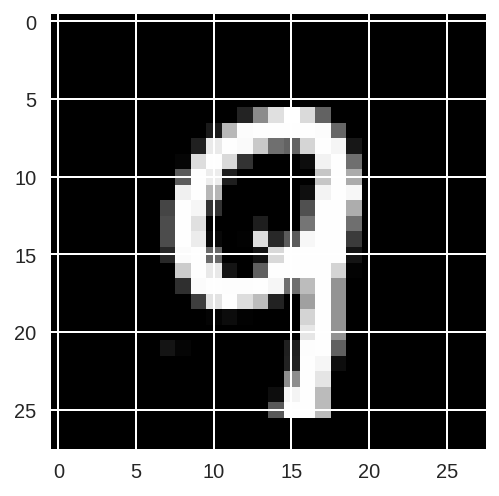

In [0]:
plt.imshow(images[50].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(x):
    return 1/(1+torch.exp(-x))
  
inputs = images.view(images.shape[0], -1)
print("inputs are: ",inputs.shape)
# Create parameters
output_layers = 10
w1 = torch.randn(inputs.shape[1], 256)
b1 = torch.randn(256)

w2 = torch.randn(256, output_layers)
b2 = torch.randn(output_layers)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print("outputs are: ",out.shape)


inputs are:  torch.Size([64, 784])
outputs are:  torch.Size([64, 10])


In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)
print(probabilities.shape)

print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
print(torch.sum(torch.exp(out), dim=0).view(-1, 1).shape)

print(torch.sum(torch.exp(out), dim=0).shape)


torch.Size([10, 1])
torch.Size([10])


In [0]:
x = torch.randn(4, 4)
x.size()
y=x.view(16)
z = x.view(-1,8)
#print("X value is ", x, "\n Y value is ", y, "\n z value is ", z)
print(z.shape)


torch.Size([2, 8])


In [0]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x


In [0]:
model = Network()
model


Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x


# Lesson 5


Package                  Version              
------------------------ ---------------------
absl-py                  0.6.1                
alabaster                0.7.12               
albumentations           0.1.8                
altair                   2.3.0                
astor                    0.7.1                
astropy                  3.0.5                
atari-py                 0.1.7                
atomicwrites             1.2.1                
attrs                    18.2.0               
audioread                2.1.6                
autograd                 1.2                  
Babel                    2.6.0                
backports.tempfile       1.0                  
backports.weakref        1.0.post1            
beautifulsoup4           4.6.3                
bleach                   3.0.2                
bokeh                    1.0.2                
boto                     2.49.0               
boto3                    1.9.62               
botocore     

In [5]:
!echo $PATH

/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [0]:
$ pip install --upgrade torch-scatter
$ pip install --upgrade torch-sparse
$ pip install --upgrade torch-cluster
$ pip install --upgrade torch-spline-conv
$ pip install torch-geometric

In [7]:
!pip install torch
!pip install --upgrade torch-scatter


    100% |████████████████████████████████| 591.8MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x612d8000 @  0x7f06c2c822a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
  Using cached https://files.pythonhosted.org/packages/2d/70/df2bc259d9606f00854ca43b6839f9047ec44900563435e0067584c93864/torch_scatter-1.0.4.tar.gz
  Running setup.py bdist_wheel for torch-scatter ... - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/75/d7/bc/4a6930b98028cdad69467cc6185b9e115975d0d9eaaf0775ca
Successfully built torch-scatter


In [10]:
!pip install --upgrade torch-sparse
!pip install --upgrade torch-cluster

Requirement already up-to-date: torch-sparse in /usr/local/lib/python3.6/dist-packages (0.2.2)
  Running setup.py bdist_wheel for torch-cluster ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/b5/ba/ca/e09a53ceb19cd796e506983c87d62b93650f5cef9ed367820a
Successfully built torch-cluster


In [11]:
!pip install --upgrade torch-spline-conv
!pip install torch-geometric

  Running setup.py bdist_wheel for torch-spline-conv ... - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/55/f7/de/e4f8e0a9acb18b604c77a63e31b9c0d140d12090df63a41fa8
Successfully built torch-spline-conv
  Running setup.py bdist_wheel for torch-geometric ... - \ done
  Stored in directory: /root/.cache/pip/wheels/e7/7b/49/a85eb3cc8f785c17692bbf2e8a699d98490bb7a6044921b8ac
  Running setup.py bdist_wheel for plyfile ... - done
  Stored in directory: /root/.cache/pip/wheels/80/bc/ac/65e2cc9d3a8f977ede5900afc0bf199bbc8559fabe4aff2a2e
Successfully built torch-geometric plyfile


In [13]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [22]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()


In [23]:
!ls

sample_data
